In [1]:
import pandas as pd
import os

ori_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/train.csv'
trn_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/customized_trn.csv'
val_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/customized_val.csv'
saved_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/trn_val.csv'

In [2]:
df = pd.read_csv(ori_data_pth, sep='\t')

In [3]:
df['f_1'].max()

66

In [4]:
trn_df = df[df['f_1'] != 66].copy()
val_df = df[df['f_1'] == 66].copy()
trn_df.drop(columns='f_0', inplace=True)
val_df.drop(columns='f_0', inplace=True)

In [5]:
trn_df.sample(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
1223263,62,20095,563,31686,21545,590,27941,19203,23218,19343,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
2900209,57,14829,22294,26672,21545,8605,27941,21218,21533,19343,...,0.000000,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,1,0
1781042,58,26325,22294,9018,21545,26484,27941,18800,31372,22970,...,0.000000,0.000000,0.000000,0.925538,0.115692,0.0,0.0,0.0,0,0
588537,54,23611,22294,17511,25604,928,27941,19203,9638,19343,...,1.142243,0.571121,0.115692,1.156922,0.231384,0.0,0.0,0.0,0,0
145638,60,17216,7152,15742,21545,23877,27941,19203,14659,19343,...,0.000000,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0


In [6]:
val_df.sample(5)

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
388800,66,11077,22294,13908,15908,7650,27941,21218,6675,19343,...,1.142243,0.571121,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0
143110,66,11077,7779,18575,25604,13503,27941,19203,6675,19343,...,0.000000,0.000000,0.115692,0.964102,0.269948,0.0,0.0,0.0,0,0
588229,66,20095,563,22861,25604,21280,27941,21218,6675,19343,...,1.142243,0.571121,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,1
1268736,66,15471,22294,17660,25604,18841,27941,21621,6675,19343,...,2.855607,1.142243,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
645910,66,26325,7152,21563,25604,23537,27941,19203,6675,19343,...,5.140093,1.713364,0.115692,1.156922,0.269948,0.0,0.0,0.0,1,1


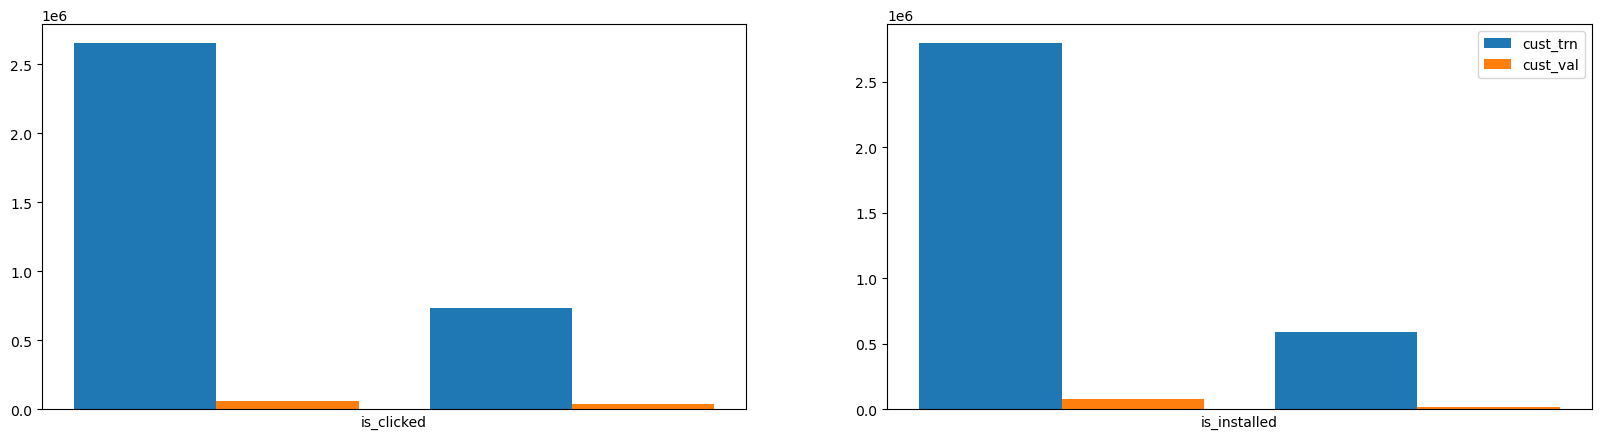

is_clicked 
Cust trn statistic - Null: 0.00 | Ratio of 1: 0.22
Cust val statistic - Null: 0.00 | Ratio of 1: 0.36
is_installed 
Cust trn statistic - Null: 0.00 | Ratio of 1: 0.17
Cust val statistic - Null: 0.00 | Ratio of 1: 0.19


In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].hist([trn_df['is_clicked'].astype(str), val_df['is_clicked'].astype(str)], bins=2, label=['cust_trn', 'cust_val'], align='mid')
ax[1].hist([trn_df['is_installed'].astype(str), val_df['is_installed'].astype(str)], bins=2, label=['cust_trn', 'cust_val'], align='mid')
plt.legend(loc='best')
ax[0].set_xlabel('is_clicked')
ax[1].set_xlabel('is_installed')
plt.show()
plt.close()

for i in ['is_clicked', 'is_installed']:
    print(f"{i} \n"
          f"Cust trn statistic - "
          f"Null: {trn_df[i].isnull().mean():.2f} | "
          f"Ratio of 1: {trn_df[i].mean():.2f}"
        )
    print(f"Cust val statistic - "
          f"Null: {val_df[i].isnull().mean():.2f} | "
          f"Ratio of 1: {val_df[i].mean():.2f}"
        )

In [12]:
trn_df.to_csv(trn_data_pth, sep='\t', index=False)
val_df.to_csv(val_data_pth, sep='\t', index=False)

In [13]:
print(trn_df.shape, val_df.shape)

(3387880, 81) (97972, 81)


In [14]:
os.system(f'(cat {trn_data_pth} && sed 1d {val_data_pth}) | cat > {saved_data_pth}')

0

In [16]:
s = ''
for i in range(2, 42):
    s += f'f_{i}:token, '
for i in range(42, 80):
    s += f'f_{i}:float, '
print(s)

f_2:token, f_3:token, f_4:token, f_5:token, f_6:token, f_7:token, f_8:token, f_9:token, f_10:token, f_11:token, f_12:token, f_13:token, f_14:token, f_15:token, f_16:token, f_17:token, f_18:token, f_19:token, f_20:token, f_21:token, f_22:token, f_23:token, f_24:token, f_25:token, f_26:token, f_27:token, f_28:token, f_29:token, f_30:token, f_31:token, f_32:token, f_33:token, f_34:token, f_35:token, f_36:token, f_37:token, f_38:token, f_39:token, f_40:token, f_41:token, f_42:float, f_43:float, f_44:float, f_45:float, f_46:float, f_47:float, f_48:float, f_49:float, f_50:float, f_51:float, f_52:float, f_53:float, f_54:float, f_55:float, f_56:float, f_57:float, f_58:float, f_59:float, f_60:float, f_61:float, f_62:float, f_63:float, f_64:float, f_65:float, f_66:float, f_67:float, f_68:float, f_69:float, f_70:float, f_71:float, f_72:float, f_73:float, f_74:float, f_75:float, f_76:float, f_77:float, f_78:float, f_79:float, 


In [20]:
click_saved_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/click_trn_val.csv'
install_saved_data_pth = '/root/data/xingmei/Sharechat-RecSys-Challenge-23/data/install_task_trn_val.csv'

In [21]:
trn_df.drop(columns='is_clicked').to_csv('tmp1.csv', sep='\t', index=False)
val_df.drop(columns='is_clicked').to_csv('tmp2.csv', sep='\t', index=False)
os.system(f'(cat tmp1.csv && sed 1d tmp2.csv) | cat > {install_saved_data_pth}')

0

In [22]:
trn_df.drop(columns='is_installed').to_csv('tmp1.csv', sep='\t', index=False)
val_df.drop(columns='is_installed').to_csv('tmp2.csv', sep='\t', index=False)
os.system(f'(cat tmp1.csv && sed 1d tmp2.csv) | cat > {click_saved_data_pth}')

0

In [23]:
os.system('rm tmp*.csv')

0